# Importing Libraries

In [760]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [761]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-28 10:11:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.08s   

2020-08-28 10:11:57 (285 KB/s) - ‘loan_train.csv’ saved [23101/23101]



# Load Data From CSV File

In [762]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [763]:
df.shape

(346, 10)

In [764]:
len(df)

346

# Convert to date time object

In [765]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



In [766]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

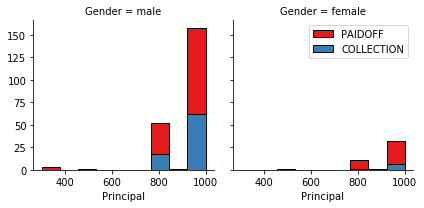

In [767]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

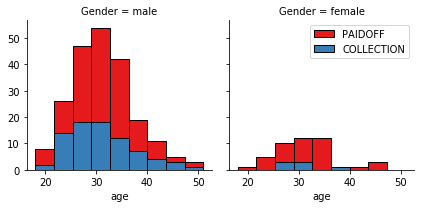

In [768]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction

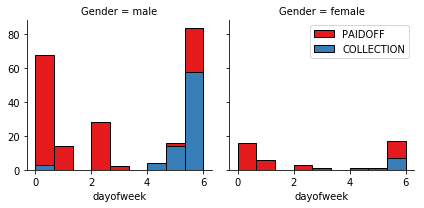

In [769]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [770]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [771]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [772]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


# One Hot Encoding

In [773]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [774]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [775]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [776]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [777]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [778]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [779]:
y=df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [780]:
Feature1 = df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)
Feature1 = pd.concat([Feature,(df['loan_status'])], axis=1)
Feature1.tail(10)

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,loan_status
336,1000,15,32,0,1,0,1,0,1
337,1000,15,30,0,1,0,0,1,1
338,800,15,35,0,1,0,1,0,1
339,1000,30,29,1,1,0,0,1,1
340,1000,30,26,0,1,0,0,1,1
341,800,15,32,0,1,0,1,0,1
342,1000,30,25,0,1,0,1,0,1
343,800,15,39,0,0,0,0,1,1
344,1000,30,28,0,0,0,0,1,1
345,1000,30,26,0,0,0,0,1,1


# Normalize Data

In [781]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

K Nearest Neighbor(KNN)
Decision Tree
Support Vector Machine
Logistic Regression


__ Notice:__

You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)

In [782]:
scalar = preprocessing.StandardScaler()
scalar.fit(Feature1.drop('loan_status',axis=1))
scaled_features = scalar.transform(Feature1.drop('loan_status',axis=1))
data_feat = pd.DataFrame(scaled_features, columns=Feature1.columns[:-1])
data_feat.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0.515785,0.920718,2.331526,-0.420560,-1.205778,-0.381701,1.136394,-0.869681
1,0.515785,0.920718,0.341701,2.377782,-1.205778,2.619854,-0.879977,-0.869681
2,0.515785,-0.959111,-0.653211,-0.420560,-1.205778,-0.381701,-0.879977,1.149847
3,0.515785,0.920718,-0.487392,2.377782,0.829340,-0.381701,-0.879977,1.149847
4,0.515785,0.920718,-0.321573,-0.420560,0.829340,-0.381701,-0.879977,1.149847


In [783]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [784]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [785]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, data_feat, Feature1['loan_status'], cv=10)
    accuracy_rate.append(score.mean())

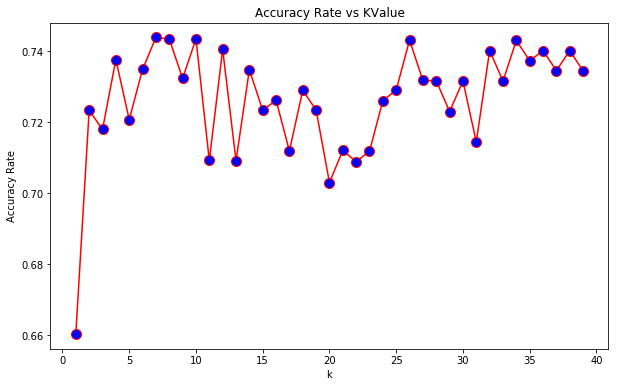

In [786]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='red', linestyle='solid', marker='o', markerfacecolor='blue', markersize=10)
plt.title("Accuracy Rate vs KValue")
plt.xlabel('k')
plt.ylabel('Accuracy Rate')
plt.show()

In [787]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
yhat = knn.predict(X_test)

In [788]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [789]:

print("Jaccard Index : ", jaccard_similarity_score(y_test, yhat))
print("F1 Score : ", f1_score(y_test, yhat, average="weighted"))
print("Log loss :", log_loss(y_test, yhat))

Jaccard Index :  0.7857142857142857
F1 Score :  0.7334244702665754
Log loss : 7.4011892159788655


In [790]:
a1=jaccard_similarity_score(y_test, yhat)
b1=f1_score(y_test, yhat, average="weighted")
c1=log_loss(y_test, yhat)

In [791]:
print("Evaluation Scores of KNN Model")
print("Jaccard Index : ", a1)
print("F1 Score  : ", b1)
print("Log loss : ", c1)

Evaluation Scores of KNN Model
Jaccard Index :  0.7857142857142857
F1 Score  :  0.7334244702665754
Log loss :  7.4011892159788655


# Decision Tree

In [792]:
from sklearn.tree import DecisionTreeClassifier

In [793]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)

In [794]:
a2=jaccard_similarity_score(y_test, yhat)
b2=f1_score(y_test, yhat, average="weighted")
c2=log_loss(y_test, yhat)

In [795]:
print("Evaluation Scores of Decision Tree Model")
print("Jaccard Index : ", a2)
print("F1 Score  : ", b2)
print("Log loss : ", c2)

Evaluation Scores of Decision Tree Model
Jaccard Index :  0.7714285714285715
F1 Score  :  0.7064793130366899
Log loss :  7.894600307334734


# Support Vector Machine

In [797]:
from sklearn import svm
sv = svm.SVC(kernel='rbf', gamma='auto')
sv.fit(X_train, y_train)
yhat = sv.predict(X_test)

In [798]:
a3=jaccard_similarity_score(y_test, yhat)
b3=f1_score(y_test, yhat, average="weighted")
c3=log_loss(y_test, yhat)

In [799]:
print("Evaluation Scores of SVM Model")
print("Jaccard Index : ", a3)
print("F1 Score  : ", b3)
print("Log loss : ", c3)

Evaluation Scores of SVM Model
Jaccard Index :  0.7428571428571429
F1 Score  :  0.7275882012724117
Log loss :  8.881479604148623


# Logistic Regression

In [825]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

In [826]:
a4=jaccard_similarity_score(y_test, yhat)
b4=f1_score(y_test, yhat, average='micro')
c4=log_loss(y_test, yhat)

In [827]:
print("Evaluation Scores of Logistic Regression Model")
print("Jaccard Index : ", a4)
print("F1 Score  : ", b4)
print("Log loss : ", c4)

Evaluation Scores of Logistic Regression Model
Jaccard Index :  0.7285714285714285
F1 Score  :  0.7285714285714285
Log loss :  9.374879272684058


# Report

In [828]:
print("Accuracy of the built model using different evaluation metrics:")
print("Algorithm","\t\t\tJaccard Score","\t\tF1 Score","\t\tLogloss")
print("KNN","\t\t\t  ",a1,"\t ",b1,"\t ",c1)
print("Decision Tree","\t\t  ",a2,"\t ",b2,"\t ",c2)
print("SVM","\t\t\t  ",a3,"\t ",b3,"\t ",c3)
print("LogisticRegression","\t  ",a4,"\t ",b4,"\t ",c4)

Accuracy of the built model using different evaluation metrics:
Algorithm 			Jaccard Score 		F1 Score 		Logloss
KNN 			   0.7857142857142857 	  0.7334244702665754 	  7.4011892159788655
Decision Tree 		   0.7714285714285715 	  0.7064793130366899 	  7.894600307334734
SVM 			   0.7428571428571429 	  0.7275882012724117 	  8.881479604148623
LogisticRegression 	   0.7285714285714285 	  0.7285714285714285 	  9.374879272684058


# Using Testing Data Set

In [829]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-08-28 10:20:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-08-28 10:20:46 (320 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [830]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [831]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


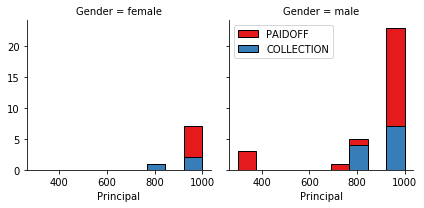

In [832]:
bins = np.linspace(test_df.Principal.min(), test_df.Principal.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

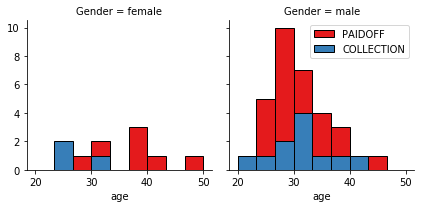

In [833]:
bins = np.linspace(test_df.age.min(), test_df.age.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

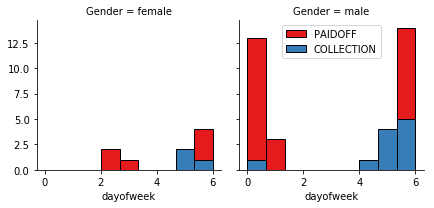

In [834]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [835]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [836]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [837]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [838]:
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [839]:
Feature2 = test_df[['Principal','terms','age','Gender','weekend']]
Feature2 = pd.concat([Feature2,pd.get_dummies(test_df['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
Feature2.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [840]:
X = Feature2
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [841]:
y = test_df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [842]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [843]:
y=test_df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [844]:
Feature2 = test_df[['Principal','terms','age','Gender','weekend']]

Feature2 = pd.concat([Feature2,pd.get_dummies(test_df['education'])], axis=1)
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
Feature2 = pd.concat([Feature2,(test_df['loan_status'])], axis=1)
Feature2.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,loan_status
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,1,0,0,0,0
2,1000,30,43,1,1,0,1,0,0
3,1000,30,26,0,1,0,0,1,0
4,800,15,29,0,1,1,0,0,0


In [845]:
print("Training Data Set:")
Feature1.tail()

Training Data Set:


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,loan_status
341,800,15,32,0,1,0,1,0,1
342,1000,30,25,0,1,0,1,0,1
343,800,15,39,0,0,0,0,1,1
344,1000,30,28,0,0,0,0,1,1
345,1000,30,26,0,0,0,0,1,1


In [846]:
print("Testing Data Set:")
Feature2.tail()

Testing Data Set:


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college,loan_status
49,1000,30,32,0,1,0,1,0,1
50,800,15,29,0,1,0,0,1,1
51,1000,30,37,0,1,0,1,0,1
52,800,15,36,0,1,0,1,0,1
53,1000,30,33,0,0,0,1,0,1


In [847]:
x1 = Feature1[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]
x1[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [848]:
y1 = Feature1[['loan_status']]
y1[0:5]

,loan_status
0,0
1,0
2,0
3,0
4,0


In [849]:
x2 = Feature2[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]
x2[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [850]:
y2 = Feature2[['loan_status']]
y2[0:5]

,loan_status
0,0
1,0
2,0
3,0
4,0


# K Nearest Neighbour

In [851]:
x1= preprocessing.StandardScaler().fit(x1).transform(x1)
x1[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [852]:
x2= preprocessing.StandardScaler().fit(x2).transform(x2)
x2[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [853]:
scalar = preprocessing.StandardScaler()
scalar.fit(Feature1.drop('loan_status',axis=1))
scaled_features = scalar.transform(Feature1.drop('loan_status',axis=1))
data_feat1 = pd.DataFrame(scaled_features, columns=Feature1.columns[:-1])
data_feat1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0.515785,0.920718,2.331526,-0.420560,-1.205778,-0.381701,1.136394,-0.869681
1,0.515785,0.920718,0.341701,2.377782,-1.205778,2.619854,-0.879977,-0.869681
2,0.515785,-0.959111,-0.653211,-0.420560,-1.205778,-0.381701,-0.879977,1.149847
3,0.515785,0.920718,-0.487392,2.377782,0.829340,-0.381701,-0.879977,1.149847
4,0.515785,0.920718,-0.321573,-0.420560,0.829340,-0.381701,-0.879977,1.149847


In [854]:
scalar = preprocessing.StandardScaler()
scalar.fit(Feature2.drop('loan_status',axis=1))
scaled_features = scalar.transform(Feature2.drop('loan_status',axis=1))
data_feat2 = pd.DataFrame(scaled_features, columns=Feature1.columns[:-1])
data_feat2.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,0.493626,0.928450,3.059819,1.977142,-1.303840,2.397916,-0.797724,-0.861357
1,-3.562691,-1.704277,0.533363,-0.505781,0.766965,-0.417029,-0.797724,-0.861357
2,0.493626,0.928450,1.880806,1.977142,0.766965,-0.417029,1.253566,-0.861357
3,0.493626,0.928450,-0.982511,-0.505781,0.766965,-0.417029,-0.797724,1.160959
4,-0.665322,-0.788546,-0.477219,-0.505781,0.766965,2.397916,-0.797724,-0.861357


In [868]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x1, y1.values.ravel())
yhat1 = knn.predict(x2)

In [869]:
a11=jaccard_similarity_score(y2, yhat1)
b11=f1_score(y2, yhat1, average="weighted")
c11=log_loss(y2, yhat1)

In [870]:
print("Evaluation Scores of KNN Model")
print("Jaccard Index : ", a11)
print("F1 Score  : ", b11)
print("Log loss : ", c11)

Evaluation Scores of KNN Model
Jaccard Index :  0.7592592592592593
F1 Score  :  0.7144140000438048
Log loss :  8.314920228309244


# Decision Trees

In [871]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
dt.fit(x1, y1)
yhat1 = dt.predict(x2)

In [872]:

a22=jaccard_similarity_score(y2, yhat1)
b22=f1_score(y2, yhat1, average="weighted")
c22=log_loss(y2, yhat1)

In [873]:
print("Evaluation Scores of Decision Tree Model")
print("Jaccard Index : ", a22)
print("F1 Score  : ", b22)
print("Log loss : ", c22)

Evaluation Scores of Decision Tree Model
Jaccard Index :  0.7407407407407407
F1 Score  :  0.7253086419753088
Log loss :  8.954571620664822


# Support Vector Machine

In [874]:
from sklearn import svm
sv = svm.SVC(kernel='rbf')
sv.fit(x1, y1.values.ravel())
yhat1 = sv.predict(x2)

In [875]:
a33=jaccard_similarity_score(y2, yhat1)
b33=f1_score(y2, yhat1, average="micro")
c33=log_loss(y2, yhat1)

In [876]:
print("Evaluation Scores of SVM Model")
print("Jaccard Index : ", a33)
print("F1 Score  : ", b33)
print("Log loss : ", c33)

Evaluation Scores of SVM Model
Jaccard Index :  0.7222222222222222
F1 Score  :  0.7222222222222222
Log loss :  9.594119361501672


# Logistic Regression

In [879]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x1, y1.values.ravel())
yhat1 = clf.predict(x2)

In [880]:
a44=jaccard_similarity_score(y2, yhat1)
b44=f1_score(y2, yhat1, average='weighted')
c44=log_loss(y2, yhat1)

In [881]:
print("Evaluation Scores of Logistic Regression Model")
print("Jaccard Index : ", a44)
print("F1 Score  : ", b44)
print("Log loss : ", c44)

Evaluation Scores of Logistic Regression Model
Jaccard Index :  0.7592592592592593
F1 Score  :  0.6717642373556352
Log loss :  8.31489061358961


# Report

In [882]:
print("Accuracy of the built model using different evaluation metrics with splitting the data for into Training and Testing sets:")
print("Algorithm","\t\t\tJaccard Score","\t\tF1 Score","\t\tLogloss")
print("KNN","\t\t\t  ",a1,"\t ",b1,"\t ",c1)
print("Decision Tree","\t\t  ",a2,"\t ",b2,"\t ",c2)
print("SVM","\t\t\t  ",a3,"\t ",b3,"\t ",c3)
print("LogisticRegression","\t  ",a4,"\t ",b4,"\t ",c4)

Accuracy of the built model using different evaluation metrics with splitting the data for into Training and Testing sets:
Algorithm 			Jaccard Score 		F1 Score 		Logloss
KNN 			   0.7857142857142857 	  0.7334244702665754 	  7.4011892159788655
Decision Tree 		   0.7714285714285715 	  0.7064793130366899 	  7.894600307334734
SVM 			   0.7428571428571429 	  0.7275882012724117 	  8.881479604148623
LogisticRegression 	   0.7285714285714285 	  0.7285714285714285 	  9.374879272684058


In [883]:
print("Accuracy of the built model using different evaluation metrics with using of separate dataset for testing:")
print("Algorithm","\t\t\tJaccard Score","\t\tF1 Score","\t\tLogloss")
print("KNN","\t\t\t  ",a11,"\t ",b11,"\t ",c11)
print("Decision Tree","\t\t  ",a22,"\t ",b22,"\t ",c22)
print("SVM","\t\t\t  ",a33,"\t ",b33,"\t ",c33)
print("LogisticRegression","\t  ",a44,"\t ",b44,"\t ",c44)

Accuracy of the built model using different evaluation metrics with using of separate dataset for testing:
Algorithm 			Jaccard Score 		F1 Score 		Logloss
KNN 			   0.7592592592592593 	  0.7144140000438048 	  8.314920228309244
Decision Tree 		   0.7407407407407407 	  0.7253086419753088 	  8.954571620664822
SVM 			   0.7222222222222222 	  0.7222222222222222 	  9.594119361501672
LogisticRegression 	   0.7592592592592593 	  0.6717642373556352 	  8.31489061358961
